In [130]:
import ezdxf
import numpy as np
import matplotlib.pyplot as plt
import math

# Create a new DXF document (AutoCAD 2000)
doc = ezdxf.new('R2000')

# Create a new modelspace
msp = doc.modelspace()

### Parameters

In [131]:
# Set document units to micrometers
doc.header['$INSUNITS'] = 13  # 13 is the code for micrometers in DXF
doc.header['$MEASUREMENT'] = 1  # 1 for metric measurement system
doc.header['$LUNITS'] = 4  # 4 for decimal units
doc.header['$LUPREC'] = 6  # 6 decimal places for units

length = 15
width = [0.1,0.15,0.2,0.3]
gap = [0.1,0.2,0.3,0.4,0.5]
number_of_rectangles = 15
turning = 0.5
bondpad_width = 100
bondpad_length = 100
field_size = 300
#width = [0.08, 0.1, 0.12, 0.15, 0.2, 0.4, 0.6, 1.0, 2.0, 4.0]
#gap = [0.05,0.1,0.2,0.5]

### Pattern

In [132]:
ipattern = 0
print("ipattern,gap,width")
for g in gap:
    for w in width:
        print(f"{ipattern},{g},{w}")
        xoffset = field_size*ipattern
        xint1 = -length/2 + xoffset
        yint1 = -(g+w)*number_of_rectangles
        x_position = xint1
        y_position = yint1
        for i in range(number_of_rectangles):
            # Create a rectangle for each width
            # Points for rectangle: bottom-left -> bottom-right -> top-right -> top-left
            points = [
                (x_position, y_position),
                (x_position+length, y_position),
                (x_position+length, y_position + w),
                (x_position, y_position + w),
                (x_position, y_position + 2*w + 2*g)
            ]
            # Draw rectangle as a closed polyline
            msp.add_lwpolyline(points, close=True)
            # Update y position for next rectangle with some spacing
            y_position += 2*w + 2*g
        points = [
            (x_position, y_position),
            (x_position, field_size/2),
            (x_position - turning, field_size/2),
            (xint1 - turning, -field_size/2),
            (xint1, -field_size/2),
            (xint1, yint1)
        ]
        # Draw rectangle as a closed polyline
        msp.add_lwpolyline(points, close=True)

        # Now create the second side
        x_position += length + turning
        y_position = y_position - g
        xint2 = x_position
        yint2 = y_position
        for i in range(number_of_rectangles):
            # Create a rectangle for each width
            # Points for rectangle: bottom-left -> bottom-right -> top-right -> top-left
            points = [
                (x_position, y_position),
                (x_position-length, y_position),
                (x_position-length, y_position-w),
                (x_position, y_position-w),
                (x_position, y_position - 2*w - 2*g)
            ]
            # Draw rectangle as a closed polyline
            msp.add_lwpolyline(points, close=True)
            # Update y position for next rectangle with some spacing
            y_position -= (2*w+2*g)
        points = [
            (x_position, y_position),
            (x_position, -field_size/2),
            (x_position + turning, -field_size/2),
            (xint2 + turning, field_size/2),
            (xint2, field_size/2),
            (xint2, yint2)
        ]
        msp.add_lwpolyline(points, close=True)

        # Create fiducial circles based on ipattern
        center_x = (xint1 + xint2) / 2 + length
        center_y = (yint1 + yint2) / 2
        radius = 1
        # Calculate number of rows needed (5 circles per row)
        rows = (ipattern + 1) // 5 if (ipattern + 1) > 5 else 1
        cols = min(5, ipattern + 1)
        
        for i in range(ipattern + 1):
            # Calculate row and column position
            row = i // 5
            col = i % 5
            
            # Offset circle position based on row and column
            circle_center_x = center_x + (col * 2 * radius) + col*0.2
            circle_center_y = center_y - (row * 2 * radius) - row*0.5
            
            # Create circle as polyline with 36 points
            circle_points = [(circle_center_x + radius * math.cos(math.radians(angle)), 
            circle_center_y + radius * math.sin(math.radians(angle))) 
               for angle in range(0, 360, 10)]
            msp.add_lwpolyline(circle_points, close=True)

        # Bondpads
        points = [
            (xint1, -field_size/2),
            (xint1-bondpad_width/2, -field_size/2 - bondpad_length),
            (xint1-bondpad_width/2, -field_size/2 - 2*bondpad_length),
            (xint1 + bondpad_width/2 + length, -field_size/2 - 2*bondpad_length),
            (xint1 + bondpad_width/2 + length, -field_size/2 - bondpad_length),
            (xint1 + length + turning, -field_size/2),
            (xint1 + length + turning + turning, -field_size/2 ),
            (xint1 + length + turning + turning + bondpad_width/2, -field_size/2 - bondpad_length),
            (xint1 + length + turning + turning + bondpad_width/2, -field_size/2 - 2*bondpad_length - turning),
            (xint1 - bondpad_width/2 - turning - turning, -field_size/2 - 2*bondpad_length - turning),
            (xint1 - bondpad_width/2 - turning - turning, -field_size/2 - bondpad_length),
            (xint1 - turning, -field_size/2),
        ]
        msp.add_lwpolyline(points, close=True)
        points = [
            (xint2, field_size/2),
            (xint2 + bondpad_width/2, field_size/2 + bondpad_length),
            (xint2 + bondpad_width/2, field_size/2 + 2*bondpad_length),
            (xint2 - bondpad_width/2 - length, field_size/2 + 2*bondpad_length),
            (xint2 - bondpad_width/2 - length, field_size/2 + bondpad_length),
            (xint2 - length - turning, field_size/2),
            (xint2 - length - turning - turning, field_size/2),
            (xint2 - length - turning - turning - bondpad_width/2, field_size/2 + bondpad_length),
            (xint2 - length - turning - turning - bondpad_width/2, field_size/2 + 2*bondpad_length + turning),
            (xint2 + bondpad_width/2 + turning + turning, field_size/2 + 2*bondpad_length + turning),
            (xint2 + bondpad_width/2 + turning + turning, field_size/2 + bondpad_length),
            (xint2 + turning, field_size/2),
        ]
        msp.add_lwpolyline(points, close=True)
        ipattern += 1

# Save the DXF file
doc.saveas('lt_wb.dxf')

ipattern,gap,width
0,0.1,0.1
1,0.1,0.15
2,0.1,0.2
3,0.1,0.3
4,0.2,0.1
5,0.2,0.15
6,0.2,0.2
7,0.2,0.3
8,0.3,0.1
9,0.3,0.15
10,0.3,0.2
11,0.3,0.3
12,0.4,0.1
13,0.4,0.15
14,0.4,0.2
15,0.4,0.3
16,0.5,0.1
17,0.5,0.15
18,0.5,0.2
19,0.5,0.3


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


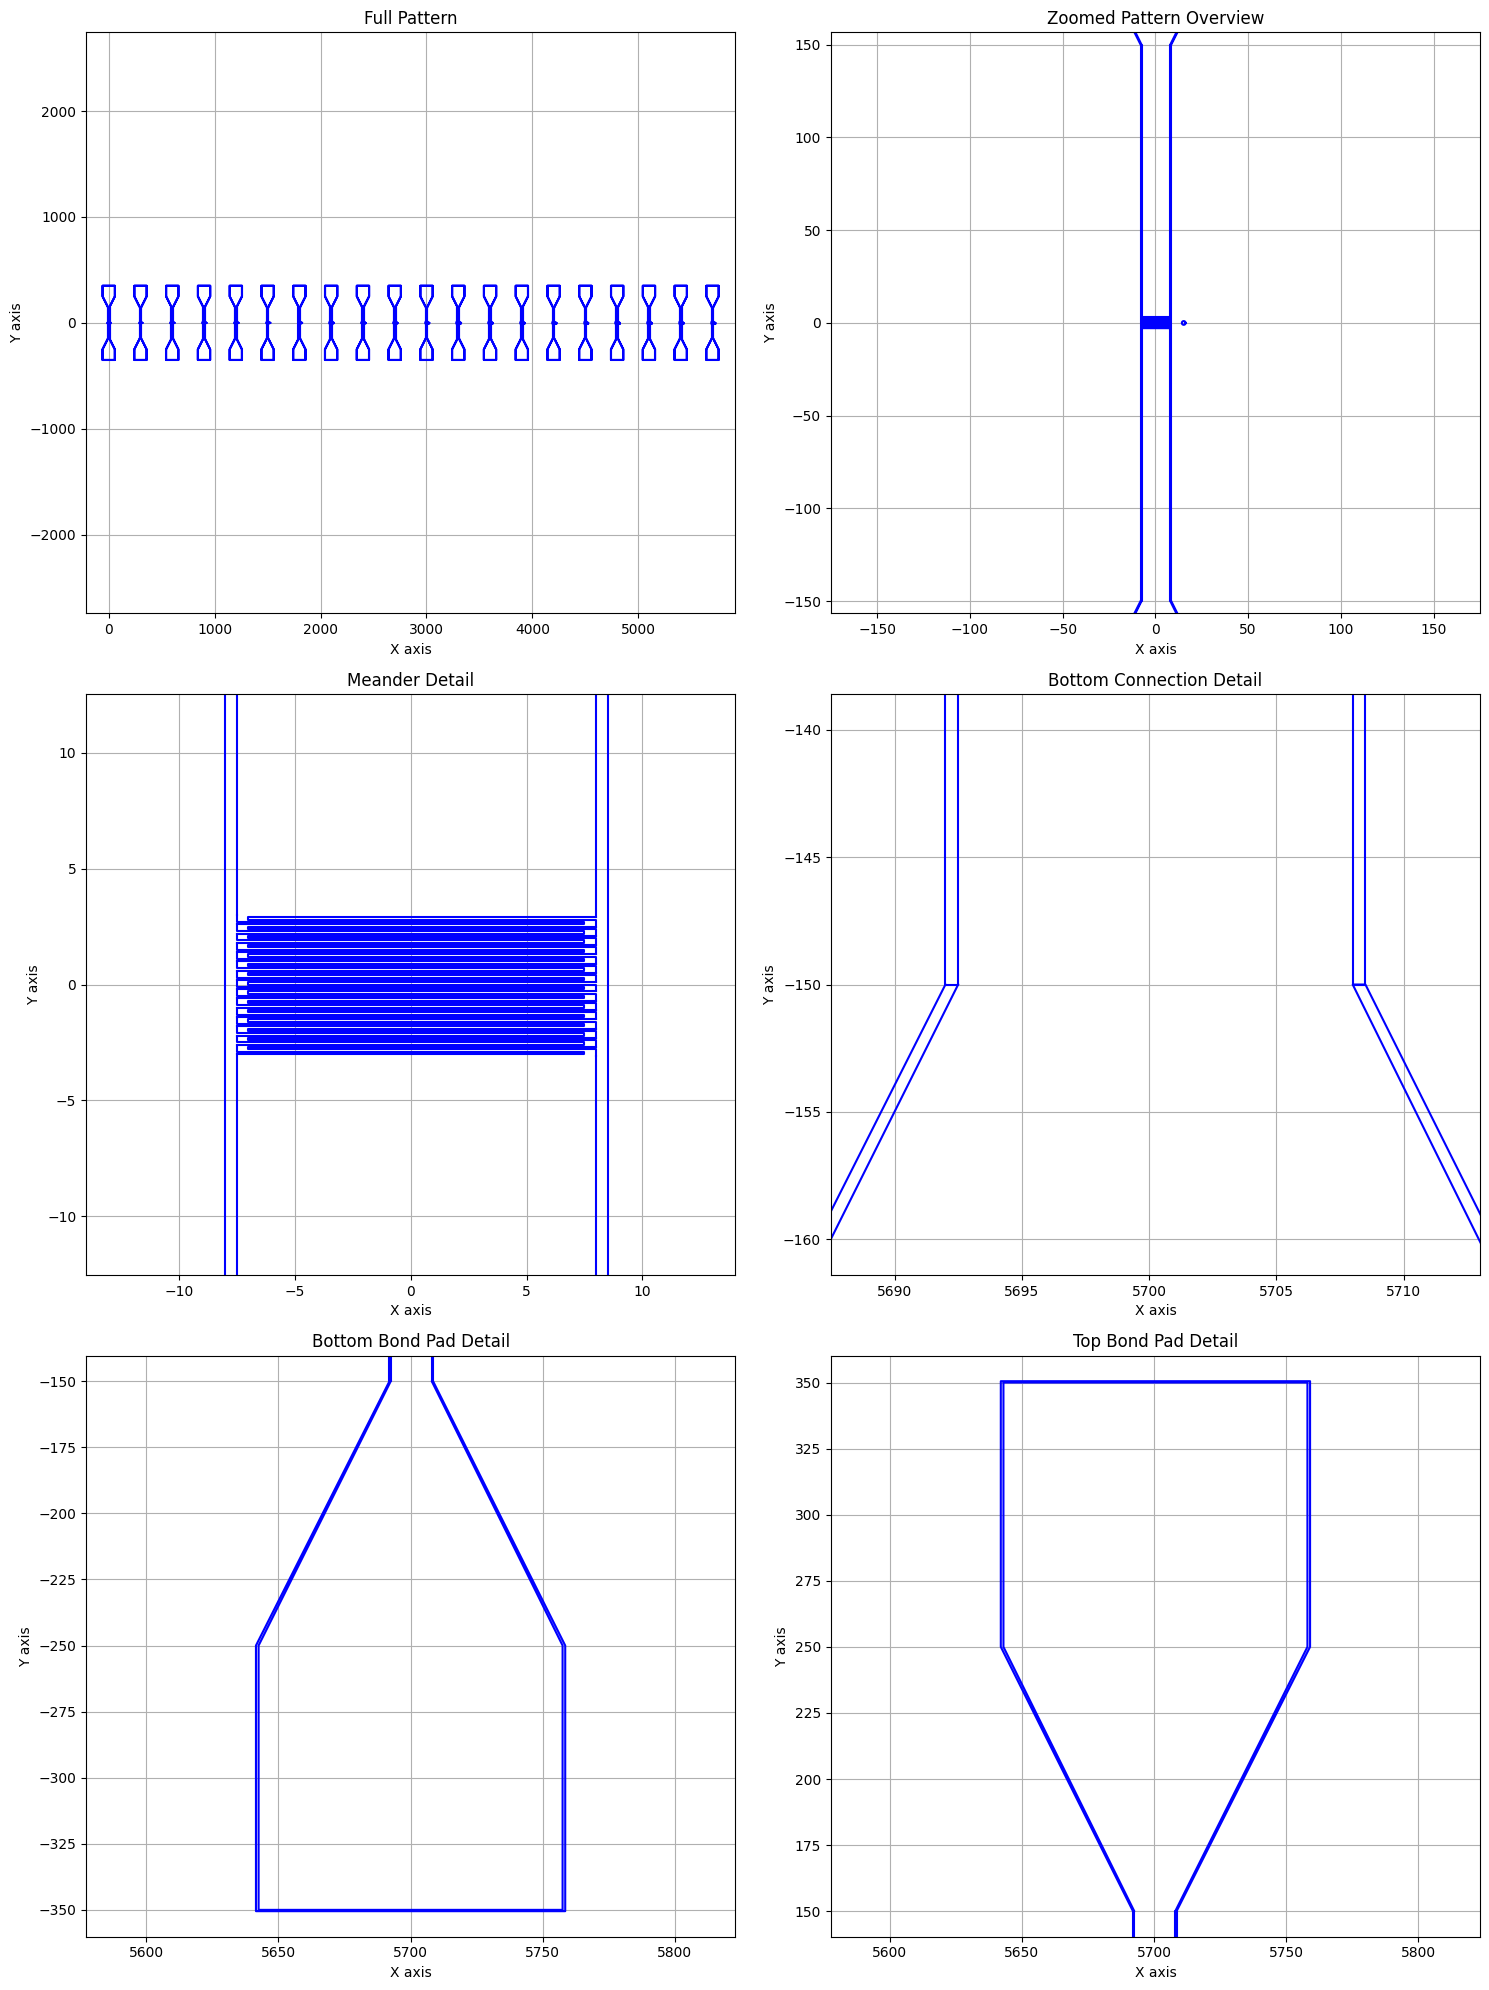

In [133]:
# Create a figure with six subplots (3x2 layout)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 20))

# Main pattern plotting
for entity in msp:
    if entity.dxftype() == 'LWPOLYLINE':
        points = entity.get_points()
        x_coords = [p[0] for p in points]
        y_coords = [p[1] for p in points]
        ax1.plot(x_coords, y_coords, 'b-')
        ax2.plot(x_coords, y_coords, 'b-')
        ax3.plot(x_coords, y_coords, 'b-')
        ax4.plot(x_coords, y_coords, 'b-')
        ax5.plot(x_coords, y_coords, 'b-')
        ax6.plot(x_coords, y_coords, 'b-')

# Configure subplots
ax1.grid(True)
ax1.set_title('Full Pattern')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.axis('equal')

ax2.grid(True)
ax2.set_title('Zoomed Pattern Overview')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.axis('equal')
ax2.set_xlim([-field_size/2, field_size/2])
ax2.set_ylim([-field_size/2, field_size/2])

ax3.grid(True)
ax3.set_title('Meander Detail')
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.axis('equal')
ax3.set_xlim([-length/2-turning-1, length/2+ turning+1])
ax3.set_ylim([-(g+w)*number_of_rectangles, (g+w)*number_of_rectangles])

ax4.grid(True)
ax4.set_title('Bottom Connection Detail')
ax4.set_xlabel('X axis')
ax4.set_ylabel('Y axis')
ax4.axis('equal')
ax4.set_xlim([xint1-5, xint1+length+turning+5])
ax4.set_ylim([-field_size/2-10, -field_size/2+10])

ax5.grid(True)
ax5.set_title('Bottom Bond Pad Detail')
ax5.set_xlabel('X axis')
ax5.set_ylabel('Y axis')
ax5.axis('equal')
ax5.set_xlim([xint1-bondpad_width-turning-turning-5, xint1+length+turning+turning+bondpad_width+5])
ax5.set_ylim([-field_size/2-2*bondpad_length-turning-5, -field_size/2+5])

ax6.grid(True)
ax6.set_title('Top Bond Pad Detail')
ax6.set_xlabel('X axis')
ax6.set_ylabel('Y axis')
ax6.axis('equal')
ax6.set_xlim([xint2-length-turning-turning-bondpad_width-5, xint2+bondpad_width+turning+turning+5])
ax6.set_ylim([field_size/2-5, field_size/2+2*bondpad_length+turning+5])

plt.tight_layout()
plt.show()
